<a href="https://colab.research.google.com/github/krishna324-art/Brain-tumor/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Initialize and fit the OneHotEncoder
encoder = OneHotEncoder()
# Assuming labels are 0 for 'yes' and 1 for 'no'
encoder.fit([[0], [1]])

OneHotEncoder()

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
#data preprocessing
data=[]
paths=[]
result=[]

for r,d,f in os.walk(r"/content/drive/MyDrive/brain_tumor_dataset/yes"):
  for file in f:
    if '.jpg'in file:
      paths.append(os.path.join(r,file))
for path in paths:
  img=Image.open(path)
  img=img.resize((128,128))
  img=np.array(img)
  if(img.shape==(128,128,3)):
    data.append(img)
    result.append(encoder.transform([[0]]).toarray())


In [125]:
#list of images withput tumor

paths=[]
for r,d,f in os.walk(r"/content/drive/MyDrive/brain_tumor_dataset/no"):
  for file in f:
    if '.jpg'in file:
      paths.append(os.path.join(r,file))
for path in paths:
  img=Image.open(path)
  img=img.resize((128,128))
  img=np.array(img)
  if(img.shape==(128,128,3)):
    data.append(img)
    result.append(encoder.transform([[1]]).toarray())



In [126]:
data=np.array(data)
data.shape

(139, 128, 128, 3)

In [127]:
print(f'total number of images we have:{len(data)}')

total number of images we have:139


In [134]:
result = np.array(result)
result = result.reshape(len(result), 2)

x_train,x_test,y_train,y_test=train_test_split(data,result,test_size=0.2,shuffle=True,random_state=0)

In [135]:
print(f"Number of images in training set:{len(x_train)}")


Number of images in training set:111


In [136]:
(f"Number of images in testing set:{len(x_test)}")

'Number of images in testing set:28'

In [181]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(2,2),input_shape=(128,128,3),padding='Same'))
model.add(Conv2D(32,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))


model.compile(loss = "categorical_crossentropy", optimizer='Adamax') # Corrected loss name
print(model.summary())

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_84 (Conv2D)              │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [182]:
y_train.shape

(111, 2)

In [183]:
history=model.fit(x_train,y_train,epochs=25,batch_size=40,verbose=1,validation_data=(x_test,y_test))

Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - loss: 31.5639 - val_loss: 45.2716
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 16.3604 - val_loss: 11.8472
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 6.6609 - val_loss: 14.2040
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 2.5367 - val_loss: 3.1787
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.5356 - val_loss: 2.6476
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 1.2405 - val_loss: 3.7444
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1.0726 - val_loss: 3.3251
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.5896 - val_loss: 2.4916
Epoch 9/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.9185 - val_loss: 1.9910
Epoch 10/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.3533 - val_loss: 1.6003
Epoch 11/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0701 - val_loss: 1.3345
Epoch 12/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0840 - val_loss: 1.23

Text(0, 0.5, 'loss')

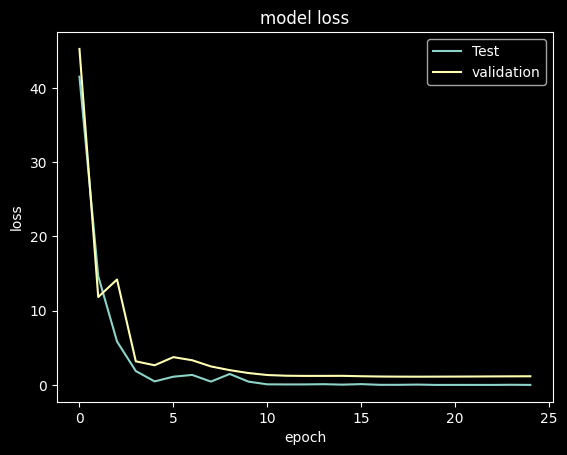

In [184]:
#plottng the losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model loss')
plt.legend(['Test','validation'],loc='upper right')
plt.ylabel('loss')


In [185]:
#testing the model
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


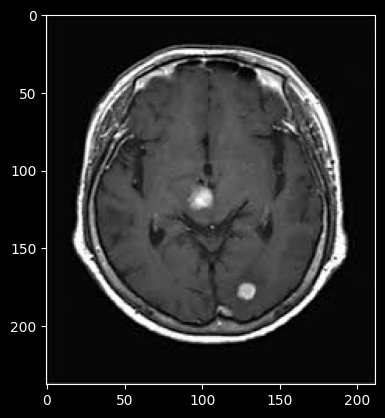

In [186]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/My Drive/brain_tumor_dataset/no/N16.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.999985% Confidence This Is A Its a Tumor


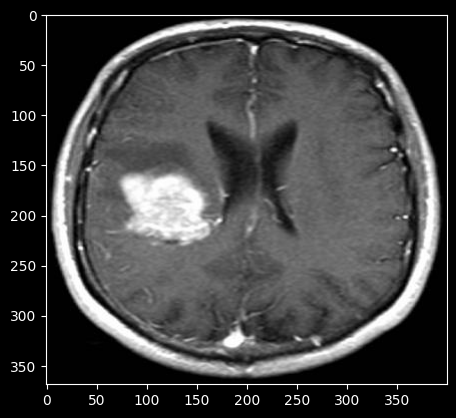

In [215]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/My Drive/brain_tumor_dataset/yes/Y11.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

In [216]:
#@title Provide a title for your app:
heading_title = "krishna brain tumor classification" # @param {type:"string"}

In [217]:
#@title You can add some example images that you want to be present in your app by default. The user can see use these images to quickly and easily test the model. How many example images do you want to load?
num_examples = 2 # @param {type:"slider", min:1, max:6, step:1}

example_path_1:  /content/drive/My Drive/brain_tumor_dataset/yes/Y11.jpg
example_path_2:  /content/drive/My Drive/brain_tumor_dataset/no/N16.jpg


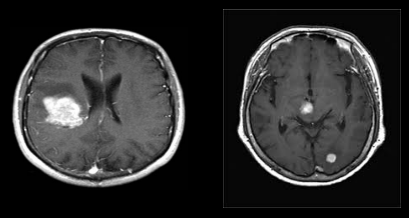

In [220]:
from matplotlib import pyplot as plt
from PIL import Image

examples=[]
for i in range(num_examples):
  example_path = input(f"example_path_{i+1}:  ")
  examples.append(example_path)

#Displaying the selected images side by side
rows = 1
plt.figure(figsize=(16, 8))
for num, x in enumerate(examples):
    img = Image.open(x)
    plt.subplot(rows,6,num+1)
   # plt.title(x.split('.')[0])
    plt.axis('off')
    plt.imshow(img)


In [222]:
#@title You can also add some description and explanation to your app's interace if you want. Go ahead and specify some text for the description and the long description (if you want to):
desc = "Brain tumor app. Let's learn!" # @param {type:"string"}
long_desc = "Select an image or upload one to predict if brain tumor is present or not" # @param {type:"string"}

In [223]:
import gradio as gr

#@title Select a Theme for Gradio Interface:
theme_selection = "Glass" # @param ["Base", "Default", "Glass", "Monochrome", "Soft"]

theme_dict = {
    "Base": gr.themes.Base(),
    "Default": gr.themes.Default(),
    "Glass": gr.themes.Glass(),
    "Monochrome": gr.themes.Monochrome(),
    "Soft": gr.themes.Soft()
}

# The selected theme is determined by the user's dropdown selection
selected_theme = theme_dict[theme_selection]

# Now you can use the selected_theme variable when you create your Gradio interface

In [224]:
def recognize_image(image):
    # Resize the image to the expected dimensions
    img = Image.fromarray(image).resize((128, 128))
    # Convert the image to a NumPy array
    x = np.array(img)
    # Reshape the image to match the model input
    x = x.reshape(1, 128, 128, 3)

    # Make a prediction
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]

    # Map the class index to the actual class name (assuming you have a list of class names)
    class_names = ['No Tumor', 'Tumor']  # Example class names, update according to your model
    result = f"{names(classification)}"

    return result

In [226]:
# Assuming recognize_image, examples, heading_title, desc, long_desc, and selected_theme are defined elsewhere.

# Update the import for components
image = gr.Image()
label = gr.Label()

# Create the interface with the updated component imports
iface = gr.Interface(
    fn=recognize_image,
    inputs=image,
    outputs=label,
    examples=examples,
    title=heading_title,
    description=desc,
    article=long_desc,
    theme=selected_theme  # Make sure this is defined based on user selection as explained in previous messages
)

iface.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://321d5d6e71ab456f66.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/protocols/http/h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/applications.py", line 1133, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py",

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://321d5d6e71ab456f66.gradio.live
